# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [1]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()
    
    

In [26]:
# Analyze here
import pandas as pd
import seaborn as sns
import requests
import random
from bs4 import BeautifulSoup

df = pd.read_csv("manga.csv")
df = df.drop(columns=['main_picture', 'url', 'title_synonyms'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           64833 non-null  int64  
 1   title              64833 non-null  object 
 2   type               64833 non-null  object 
 3   score              24636 non-null  float64
 4   scored_by          64833 non-null  int64  
 5   status             64833 non-null  object 
 6   volumes            48211 non-null  float64
 7   chapters           46042 non-null  float64
 8   start_date         62950 non-null  object 
 9   end_date           51932 non-null  object 
 10  members            64833 non-null  int64  
 11  favorites          64833 non-null  int64  
 12  sfw                64833 non-null  bool   
 13  approved           64833 non-null  bool   
 14  created_at_before  64833 non-null  object 
 15  updated_at         62678 non-null  object 
 16  real_start_date    629

# My Question


### Write your question here.
### When randomly choosing a book, what is the theoretical probability that you pull a manhwa or manhua? What is the probability that is sfw(safe for work)? You start to think too much. In what month do most books start to serialize or publish and what is the average amount of serializations per month? What type of book has the most published works and which type has the least?

Context: Japan-manga, China-Manhua, South Korea-Manhwa (they are all forms of comics)
Context Part 2: Many manga, are "serialized", meaning that they release 1 chapter a week, or month(tend to be longer) depending on what magazine they are being serialized, after successfully publishing multiple chapters, they are combined into 1 volume. Most weekly serializations have 7 or 8 chapters in the first volume, then 10 on the following ones. 

# My Analysis

In [3]:
# Making it so that the serializations that were just empty [] be filled with something.
df['serializations'] = df['serializations'].replace('[]', 'Unknown')

In [4]:
# Removing unnecessary(right?) brackets and spaces!
df['serializations'] = df['serializations'].str.replace(r'[\[\]\s]', '', regex=True)
# Removing the single quotes that were around the serialization names.
df['serializations'] = df['serializations'].str.replace("'", "", regex=False)


#### The code above ^ is just fixing the data so that it is more usable and pleasant!

In [112]:
df["type"].value_counts()

manga          42772
light_novel    10222
one_shot        4978
manhwa          2800
doujinshi       1739
manhua           307
novel            132
Name: type, dtype: int64

### Theoretical P:  P(Choosing a Manhua U Manhwa) = 4.79%

#### total_comics = 64833 
manhua = 307 # Chinese "comics"
manhwa = 2800 # Korean "comics"

manhuawa = manhua + manhwa # Combo of both

theo_p = (manhuawa / total_comics) * 100
theo_p 

In [114]:
count = 0
trials = 100000
manhua_manhwa = 0

while count < trials:
    num = random.randint(1, total_comics)
    if (num <= manhuawa):
        manhua_manhwa += 1
    count += 1
print((manhua_manhwa / trials) * 100)

4.649


### Empirical P = 4.649 %
#### The theoretical probability of randomly pulling a manhua or a manhwa is a 4.79%. This appears to be accurate because the empirical probability is a 4.649%, after running a simulation of 100,000 trials.  They are very close, with them being ariund 5%. Also, we are not randomly pulling and taking it out, the sample space remains the same in quantity. I guess there aren't that many manhuas or manhwas in a manga dataset...

In [84]:
df["sfw"].value_counts()

True     44006
False    18944
Name: sfw, dtype: int64

In [88]:
manhwa_sfw = 0
manhwa_nsfw = 0

manhua_sfw = 0
manhua_nsfw = 0

for index, row in df.iterrows():
    if row["type"] == "manhwa" and row["sfw"] == True:
        manhwa_sfw += 1
    elif row["type"] == "manhwa" and row["sfw"] == False:
        manhwa_nsfw += 1
    elif row["type"] == "manhua" and row["sfw"] == True:
        manhua_sfw += 1
    elif row["type"] == "manhua" and row["sfw"] == False:
        manhua_nsfw += 1

In [115]:
combo_sfw = manhwa_sfw + manhua_sfw
combo_nsfw = manhwa_nsfw + manhua_nsfw

In [111]:
manhuawa # The amount of manhua and manhwa in the data

3336

In [117]:
print(manhua)
print(manhua_sfw)

307
300


In [121]:
#China
trials = 10000
count = 0
actually_sfw = 0
while count < trials:
    numy = random.randint(1, 307)
    if numy < 300:
        actually_sfw += 1
    count += 1
print((actually_sfw/ trials) * 100)

97.11999999999999


In [122]:
print(manhwa)
print(manhwa_sfw)

2800
2467


In [123]:
#Korea
trials = 10000
count = 0
actually_sfw_2 = 0
while count < trials:
    numy = random.randint(1, 2800)
    if numy < manhwa_sfw:
        actually_sfw_2 += 1
    count += 1
print((actually_sfw_2/ trials) * 100)

87.46000000000001


### If you randomly pull a manhua, the empirical probability that it is safe for work is 97.1%. If you pull a manhwa, the empirical probability that it is safe for work is 87.46%.

In [31]:
df.dropna(subset=["start_date"], inplace=True)

In [50]:
df["start_date"] = pd.to_datetime(df['start_date'], errors='coerce')
df["month"] = df["start_date"].dt.month

In [51]:
df["month"].value_counts()

1     11003
12     5466
8      5312
4      4965
7      4727
10     4704
6      4606
5      4567
3      4477
11     4462
9      4383
2      4278
Name: month, dtype: int64

In [63]:
months = {"Jan": 0, "Feb": 0, "Mar": 0, "Apr": 0, "May": 0, "Jun": 0, "Jul": 0, "Aug": 0, "Sep": 0, "Oct": 0, 
        "Nov": 0, "Dec": 0}

for date in df["month"]:
    #month = date.split("-")[1]
    if date == 1:
        months["Jan"] += 1
    elif date == 2:
        months["Feb"] += 1
    elif date == 3:
        months["Mar"] += 1
    elif date == 4:
        months["Apr"] += 1
    elif date == 5:
        months["May"] += 1
    elif date == 6:
        months["Jun"] += 1
    elif date == 7:
        months["Jul"] += 1
    elif date == 8:
        months["Aug"] += 1
    elif date == 9:
        months["Sep"] += 1
    elif date == 10:
        months["Oct"] += 1
    elif date == 11:
        months["Nov"] += 1
    elif date == 12:
        months["Dec"] += 1
#months

<AxesSubplot:xlabel='Months', ylabel='Count'>

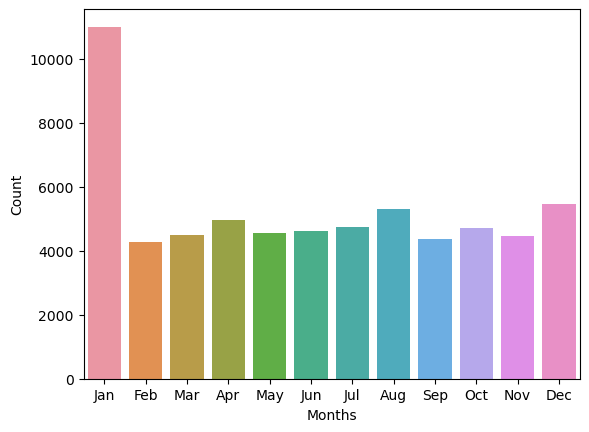

In [60]:
dates = {
    "Months":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Count":[months["Jan"], months["Feb"], months["Mar"], months["Apr"], months["May"], months["Jun"], months["Jul"], months["Aug"], months["Sep"], months["Oct"], months["Nov"], months["Dec"]]
}

dates = pd.DataFrame(dates)
sns.barplot(data=dates, x="Months", y="Count")

In [78]:
df["month"].value_counts()

1     11003
12     5466
8      5312
4      4965
7      4727
10     4704
6      4606
5      4567
3      4477
11     4462
9      4383
2      4278
Name: month, dtype: int64

In [80]:
mean_value = sum(months.values()) / len(months)
mean_value

5245.833333333333

#### Apparently, the month with the most series starting to serialize is January, it has over 10,000 serializations. Looking at the loop, January has exactly 11,003 starting serializations The average amount of works published or serialized per month is 5,245.

<AxesSubplot:xlabel='type', ylabel='Count'>

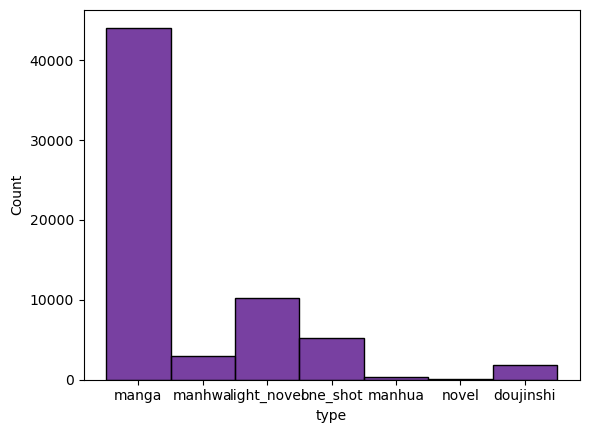

In [8]:
#df[(df["type"] == 'manhua') & (df["sfw"] == True)]
sns.histplot(data=df, x="type", color="Indigo")

In [66]:
df["type"].value_counts()

manga          42772
light_novel    10222
one_shot        4978
manhwa          2800
doujinshi       1739
manhua           307
novel            132
Name: type, dtype: int64

In [75]:
pre_freq_table = {"Type": [], "Frequency": []}
manga = 0
light_novel = 0
one_shot = 0
manhwa = 0
doujinshi = 0
manhua = 0
novel = 0
for what_type in df["type"]:
    if what_type == "manga":
        manga += 1
    elif what_type == "light_novel":
        light_novel += 1
    elif what_type == "one_shot":
        one_shot += 1
    elif what_type == "manhwa":
        manhwa += 1
    elif what_type == "doujinshi":
        doujinshi += 1
    elif what_type == "manhua":
        manhua += 1
    elif what_type == "novel":
        novel += 1
        
add_freq = ["Manga", "Light Novel", "One Shot", "Manhwa", "Doujinshi", "Manhua", "Novel"]
pre_freq_table["Type"] = pre_freq_table["Type"] + add_freq

pre_freq_table["Frequency"].append(manga)
pre_freq_table["Frequency"].append(light_novel)
pre_freq_table["Frequency"].append(one_shot)
pre_freq_table["Frequency"].append(manhwa)
pre_freq_table["Frequency"].append(doujinshi)
pre_freq_table["Frequency"].append(manhua)
pre_freq_table["Frequency"].append(novel)

In [77]:
freqTable = pd.DataFrame(pre_freq_table)
freqTable["Percent"] = (freqTable["Frequency"] / len(df)) * 100
freqTable


,Type,Frequency,Percent
0,Manga,42772,67.945989
1,Light Novel,10222,16.238284
2,One Shot,4978,7.907863
3,Manhwa,2800,4.447975
4,Doujinshi,1739,2.762510
5,Manhua,307,0.487689
6,Novel,132,0.209690


### The type of work that has the most publishes is manga! Looking at a relative frequency table, it has a total of 42,772 total works, which makes up for 67.9% of the entire data. The type of work with the least are novels, with 0.2% of the data...

# My Answer

### The theoretical probability of randomly pulling a manhua or manhwa is 4.8